## Importing libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Preprocessing

In [ ]:
df1 = pd.read_csv('table duration.xlsx - table.csv')
df2 = pd.read_csv('intensity.csv')

In [ ]:
df1.drop(['gender', 'sentence', 'repetition'], axis=1, inplace=True)
df2.drop(['fileName', 'speaker', 'repetition', 'sex', 'sentence'], axis=1, inplace=True)

In [ ]:
df = pd.concat([df1, df2], axis=1)

In [ ]:
df['speaker '] = df['speaker '].str.replace(r'PP(\d\d)', r'\1', regex=True)

In [ ]:
df['speaker '] = df['speaker '].astype(int)

In [ ]:
df.columns = df.columns.str.strip()

## Machine Learning Pipeline Supervised

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('speaker', axis=1), df['speaker'], test_size=0.2, random_state=49)

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
base_models = [
    ('lda', LinearDiscriminantAnalysis()),
    ('logreg', LogisticRegression(solver='newton-cg', max_iter=100, n_jobs=-1)),
    ('ovrrf', OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=100, n_jobs=-1)))
]


meta_learner = RandomForestClassifier(n_estimators=100, n_jobs=-1)

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

stacking_model.fit(X_train, y_train)

predictions = stacking_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60        25
           2       0.43      0.56      0.49        18
           3       0.55      0.75      0.63        16
           4       0.44      0.61      0.51        18
           5       0.45      0.41      0.43        22
           6       0.33      0.40      0.36        15
           7       0.59      0.40      0.48        25
           8       0.55      0.48      0.51        25
           9       0.90      0.86      0.88        21
          10       0.25      0.25      0.25        16
          11       0.50      0.52      0.51        21
          12       0.56      0.86      0.68        21
          13       0.88      0.84      0.86        25
          14       0.59      0.59      0.59        22
          15       0.56      0.41      0.47        22
          16       0.30      0.30      0.30        20
          17       0.90      0.93      0.91        28
          18       0.56    

In [109]:
joblib.dump(stacking_model, 'model.joblib')

['model.joblib']

In [110]:
df.to_csv('df.csv')

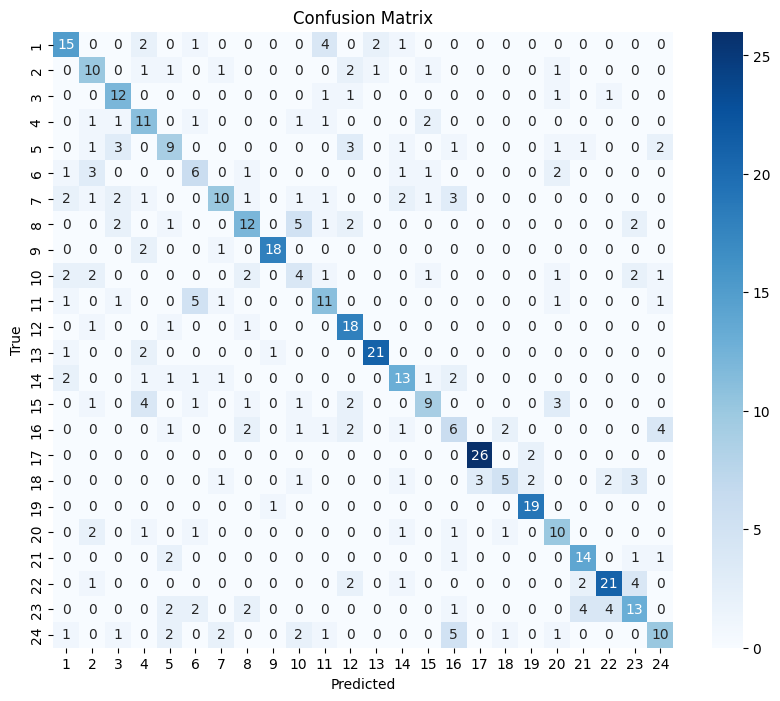

In [108]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 25), yticklabels=range(1, 25))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()